<a href="https://colab.research.google.com/github/K-julius/dl_project/blob/main/motion_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CPU

In [1]:
from google.colab.patches import cv2_imshow

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import cv2
import glob
import shutil
import os

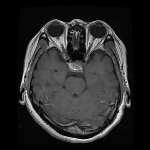

In [2]:
 #process one train image as instance
train_instance = cv2.imread('/content/drive/MyDrive/DL_project/archive/train/pituitary/Tr-piTr_0000.jpg')
image_resized = cv2.resize(train_instance, (150, 150), 0, 0, cv2.INTER_CUBIC)

cv2_imshow(image_resized) #in colab, cv.imshow -> cv_imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

7
25


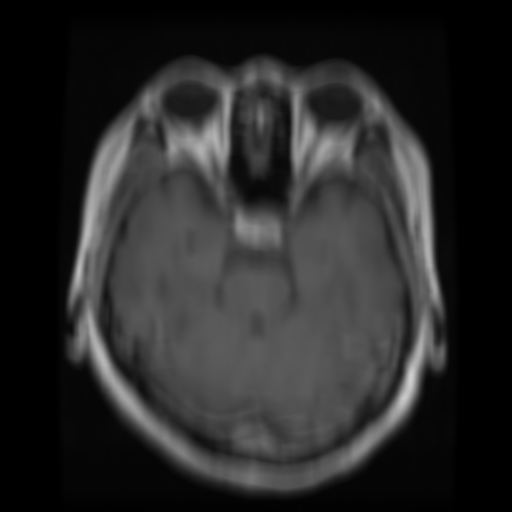

In [7]:
#motion blur
size = [1, 7, 13, 19, 25] #randomly select motion blur size(1 for original image)
size = random.choice(size)
motion = np.zeros((size, size))
motion[int((size-1)/2), :] = np.ones(size) #horizontal motion blur
motion = motion / size
print(size) #check size

#motion_h_blurred = cv2.filter2D(image_resized, -1, motion)
motion_h_blurred = cv2.filter2D(train_instance, -1, motion)

size = [1, 7, 13, 19, 25]
size = random.choice(size)

motion = np.zeros((size, size))
motion[:, int((size-1)/2)] = np.ones(size) #vertical motion blur
motion = motion / size
print(size) #check size

motion_v_blurred = cv2.filter2D(motion_h_blurred, -1, motion)

cv2_imshow(motion_v_blurred)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
#add noise to image
path = '/content/drive/MyDrive/DL_project/archive/'
train_file_path = os.path.join(path, 'train')
test_file_path = os.path.join(path, 'test')

path_n = '/content/drive/MyDrive/DL_project/archive_noise/'
train_file_path_n = os.path.join(path_n, 'train')
test_file_path_n = os.path.join(path_n, 'test')

categories = ['meningioma', 'glioma', 'notumor', 'pituitary']

for category in categories:
  train_path = os.path.join(train_file_path, category)
  test_path = os.path.join(test_file_path, category)

  train_file_list = glob.glob(train_path +'/*')
  test_file_list = glob.glob(test_path +'/*')

  train_noise_path = os.path.join(train_file_path_n, category)
  test_noise_path = os.path.join(test_file_path_n, category)

  for i in range(len(train_file_list)):
    image = cv2.imread(train_file_list[i])

    #motion blur
    size = [1, 7, 13, 19, 25] #randomly select motion blur size(1 for original image)
    size_h = random.choice(size)
    motion = np.zeros((size_h, size_h))
    motion[int((size_h-1)/2), :] = np.ones(size_h) #horizontal motion blur
    motion = motion / size_h

    #motion_h_blurred = cv2.filter2D(image_resized, -1, motion)
    motion_h_blurred = cv2.filter2D(image, -1, motion)

    size_v = random.choice(size)

    motion = np.zeros((size_v, size_v))
    motion[:, int((size_v-1)/2)] = np.ones(size_v) #vertical motion blur
    motion = motion / size_v

    motion_v_blurred = cv2.filter2D(motion_h_blurred, -1, motion)

    cv2.imwrite(train_noise_path + '/' + os.path.basename(train_file_list[i]), motion_v_blurred)

  for i in range(len(test_file_list)):
    image = cv2.imread(test_file_list[i])

    #motion blur
    size = [1, 7, 13, 19, 25] #randomly select motion blur size(1 for original image)
    size_h = random.choice(size)
    motion = np.zeros((size_h, size_h))
    motion[int((size_h-1)/2), :] = np.ones(size_h) #horizontal motion blur
    motion = motion / size_h

    #motion_h_blurred = cv2.filter2D(image_resized, -1, motion)
    motion_h_blurred = cv2.filter2D(image, -1, motion)

    size_v = random.choice(size)

    motion = np.zeros((size_v, size_v))
    motion[:, int((size_v-1)/2)] = np.ones(size_v) #vertical motion blur
    motion = motion / size_v

    motion_v_blurred = cv2.filter2D(motion_h_blurred, -1, motion)

    cv2.imwrite(test_noise_path + '/' + os.path.basename(test_file_list[i]), motion_v_blurred)


In [9]:
#check for the noise image

dataset_path = "/content/drive/MyDrive/DL_project/archive_noise"

#define the training and testing directories
train_dir = os.path.join(dataset_path, 'train')
test_dir = os.path.join(dataset_path, 'test')

#define the categories
categories = ["glioma", "meningioma", "notumor", "pituitary"]

train_data = []

for category in categories:
    path = os.path.join(train_dir, category)
    images = os.listdir(path)
    count = len(images)
    train_data.append(pd.DataFrame({"Image" : images, "Category": [category] * count, "Count" : [count]*count}))

    train_df = pd.concat(train_data, axis=0)

# Visualize the distribution of tumor types in the training dataset
# ratio = train_df["Count"].unique()
print(train_df['Category'].value_counts(), '\n')

test_data = []

for category in categories:
    path = os.path.join(test_dir, category)
    images = os.listdir(path)
    count = len(images)
    test_data.append(pd.DataFrame({"Image" : images, "Category": [category] * count, "Count" : [count]*count}))

    test_df = pd.concat(test_data, axis=0)

# Visualize the distribution of tumor types in the training dataset
# ratio = train_df["Count"].unique()
print(test_df['Category'].value_counts())

notumor       1595
pituitary     1457
meningioma    1339
glioma        1321
Name: Category, dtype: int64 

notumor       405
meningioma    306
glioma        300
pituitary     300
Name: Category, dtype: int64


archive_full 과 archive_noise_full 생성(tumor class 상관없이 train과 test만 있는 file)

In [10]:
def copy_images(source_dir, destination_dir, num):

  # Get the list of files in the source directory
  files = os.listdir(source_dir)

  # Randomly select number of files to copy
  if num is None:
    num = len(files)
  random_files = random.sample(files, num)

  # Create the destination directory
  os.makedirs(destination_dir, exist_ok=True)

  # Copy the files to the destination directory
  for file in random_files:
    if file.endswith('.jpg'):
      shutil.copyfile(os.path.join(source_dir, file), os.path.join(destination_dir, file))

# Print a message to the user
print('Images copied successfully.')

Images copied successfully.


In [11]:
categories = ['meningioma', 'glioma', 'notumor', 'pituitary']

for category in categories:
  source_dir = '/content/drive/MyDrive/DL_project/archive/train/' + category
  copy_images(source_dir, '/content/drive/MyDrive/DL_project/archive_full/train/', 500)

  source_dir = '/content/drive/MyDrive/DL_project/archive/test/' + category
  copy_images(source_dir, '/content/drive/MyDrive/DL_project/archive_full/test/' , 100)

  source_dir = '/content/drive/MyDrive/DL_project/archive_noise/train/' + category
  copy_images(source_dir, '/content/drive/MyDrive/DL_project/archive_noise_full/train/', 500)

  source_dir = '/content/drive/MyDrive/DL_project/archive_noise/test/' + category
  copy_images(source_dir, '/content/drive/MyDrive/DL_project/archive_noise_full/test/', 100)

In [12]:
def count_files(directory):

  return len(glob.glob(os.path.join(directory, '*')))

print(count_files('/content/drive/MyDrive/DL_project/archive_full/train'))
print(count_files('/content/drive/MyDrive/DL_project/archive_full/test'))
print(count_files('/content/drive/MyDrive/DL_project/archive_noise_full/train'))
print(count_files('/content/drive/MyDrive/DL_project/archive_noise_full/test'))

2000
400
2000
400
